<a href="https://colab.research.google.com/github/Dhamu785/AI-scratch/blob/main/TensorFlow/03_LR_with_large_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing library**

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## **Reading data**

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df1 = df.drop_duplicates()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df1.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df1.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df1.memory_usage()

Index       10696
age         10696
sex         10696
bmi         10696
children    10696
smoker      10696
region      10696
charges     10696
dtype: int64

In [9]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks YouTube tutorials/8 Tensorflow and keras/TF Daniel Bourke/03_data/Insurance.csv')

## **Pre-processing**

In [10]:
df_one_hot = pd.get_dummies(df)
df_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [11]:
pre_df1 = df_one_hot.drop(['sex_female', 'smoker_no','region_northeast'], axis=1)
pre_df1.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [12]:
x = pre_df1.drop('charges',axis=1)
y = pre_df1['charges']

x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [13]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

len(x_train), len(x_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

## **Building model**
- Early stopping, call back and check points

### **Attempt-1**

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer = tf.keras.optimizers.SGD(), loss='mae', metrics=['mae','accuracy'])

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 10ms/step - loss: 8151.2749 - mae: 8151.2749 - accuracy: 0.0000e+00
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 7303.3472 - mae: 7303.3472 - accuracy: 0.0000e+00
Epoch 3/100
34/34 [==============================] - 0s 8ms/step - loss: 7447.6167 - mae: 7447.6167 - accuracy: 0.0000e+00
Epoch 4/100
34/34 [==============================] - 0s 9ms/step - loss: 7581.3052 - mae: 7581.3052 - accuracy: 0.0000e+00
Epoch 5/100
34/34 [==============================] - 0s 7ms/step - loss: 7565.2563 - mae: 7565.2563 - accuracy: 0.0000e+00
Epoch 6/100
34/34 [==============================] - 7s 207ms/step - loss: 7538.5684 - mae: 7538.5684 - accuracy: 0.0000e+00
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7298.9194 - mae: 7298.9194 - accuracy: 0.0000e+00
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7376.7886 - mae: 7376.7886 - accuracy: 0.0000e+00
Epoch 9/100
3

In [16]:
x_test.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1004,47,19.19,1,1,0,0,0,0
437,35,28.90,3,1,0,0,0,1
161,18,36.85,0,0,1,0,1,0
591,47,19.57,1,1,0,1,0,0
885,32,28.93,1,1,1,0,1,0


In [17]:
y_train[0]

16884.924

In [18]:
inputs = tf.constant([35,28.900,3,1,0,0,0,1])
inputs1 = inputs[tf.newaxis]

inputs, inputs1

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([35. , 28.9,  3. ,  1. ,  0. ,  0. ,  0. ,  1. ], dtype=float32)>,
 <tf.Tensor: shape=(1, 8), dtype=float32, numpy=array([[35. , 28.9,  3. ,  1. ,  0. ,  0. ,  0. ,  1. ]], dtype=float32)>)

In [19]:
model.predict(inputs1)

1/1 [==============================] - 0s 93ms/step


array([[11194.959]], dtype=float32)

### **Attempt-2**

In [20]:
# model2 = tf.keras.Sequential([
#     tf.keras.layers.Dense(100),
#     tf.keras.layers.Dense(10),
#     tf.keras.layers.Dense(1)
# ])


model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(6,input_shape=(8,)),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

model2.compile(optimizer = tf.keras.optimizers.SGD(), loss='mae', metrics=['mae','accuracy'])

model2.fit(x_train,y_train,epochs=10)

Epoch 1/10
34/34 [==============================] - 1s 2ms/step - loss: nan - mae: nan - accuracy: 0.0000e+00
Epoch 2/10
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan - accuracy: 0.0000e+00
Epoch 3/10
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan - accuracy: 0.0000e+00
Epoch 4/10
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan - accuracy: 0.0000e+00
Epoch 5/10
34/34 [==============================] - 4s 114ms/step - loss: nan - mae: nan - accuracy: 0.0000e+00
Epoch 6/10
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan - accuracy: 0.0000e+00
Epoch 7/10
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan - accuracy: 0.0000e+00
Epoch 8/10
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan - accuracy: 0.0000e+00
Epoch 9/10
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan - accuracy: 0.0000e+00
Epoch 10

In [21]:
model2.predict(inputs1)

1/1 [==============================] - 0s 56ms/step


array([[nan]], dtype=float32)

In [22]:
# model2 = tf.keras.Sequential([
#     tf.keras.layers.Dense(100),
#     tf.keras.layers.Dense(10),
#     tf.keras.layers.Dense(1)
# ])


model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(6,input_shape=(8,)),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

model2.compile(optimizer = tf.keras.optimizers.Adam(), loss='mae', metrics=['mae','accuracy'])

history = model2.fit(x_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 50ms/step - loss: 12928.8389 - mae: 12928.8389 - accuracy: 0.0000e+00
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 12897.5195 - mae: 12897.5195 - accuracy: 0.0000e+00
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12861.0537 - mae: 12861.0537 - accuracy: 0.0000e+00
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12817.0898 - mae: 12817.0898 - accuracy: 0.0000e+00
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 12763.3906 - mae: 12763.3906 - accuracy: 0.0000e+00
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 12696.9668 - mae: 12696.9668 - accuracy: 0.0000e+00
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12613.7715 - mae: 12613.7715 - accuracy: 0.0000e+00
Epoch 8/100
34/34 [==============================] - 2s 65ms/step - loss: 12508.4404 - mae: 12508.4404 - accuracy: 0.0000e+0

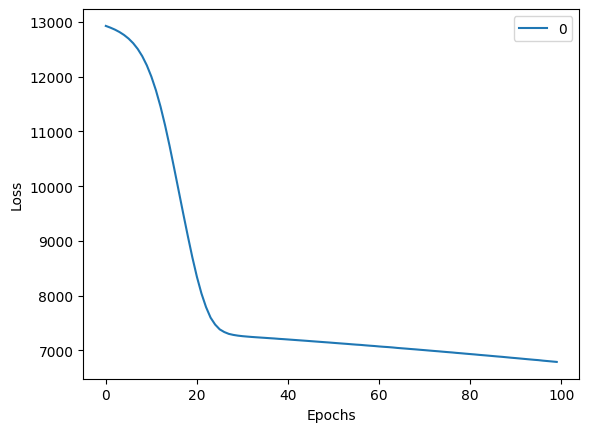

In [23]:
pd.DataFrame(history.history['mae']).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

### **Attempt-3**

In [24]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=(8,)),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model2.compile(optimizer = tf.keras.optimizers.Adam(), loss='mae', metrics=['mae','accuracy'])

history = model2.fit(x_train,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 3s 55ms/step - loss: 12741.5566 - mae: 12741.5566 - accuracy: 0.0000e+00
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 10270.5225 - mae: 10270.5225 - accuracy: 0.0000e+00
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 7159.5913 - mae: 7159.5913 - accuracy: 0.0000e+00
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 7047.0991 - mae: 7047.0991 - accuracy: 0.0000e+00
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 6946.0552 - mae: 6946.0552 - accuracy: 0.0000e+00
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 6845.0884 - mae: 6845.0884 - accuracy: 0.0000e+00
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 6758.7266 - mae: 6758.7266 - accuracy: 0.0000e+00
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 6657.7803 - mae: 6657.7803 - accuracy: 0.0000e+00
Epoch 9/200

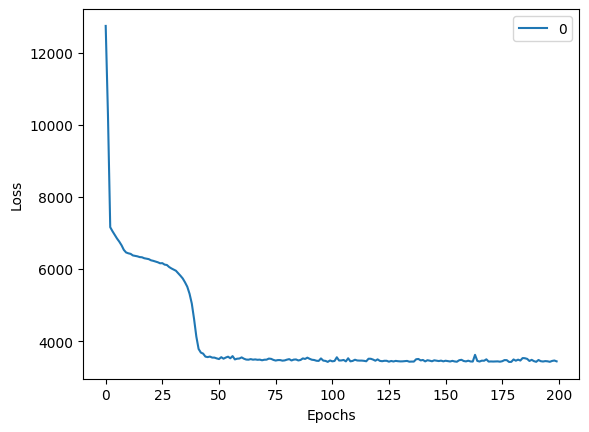

In [25]:
pd.DataFrame(history.history['mae']).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

## **Data pre-processing**

In [26]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


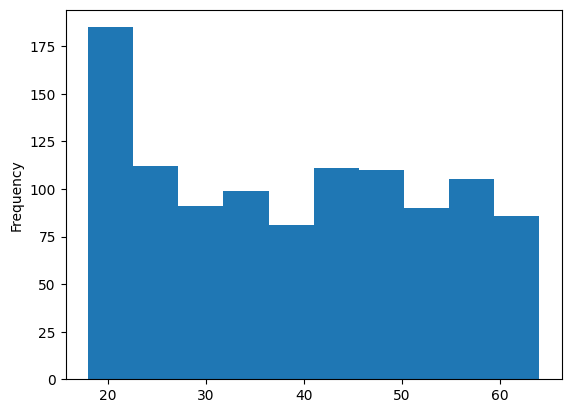

In [28]:
x_train['age'].plot(kind='hist')
plt.show()

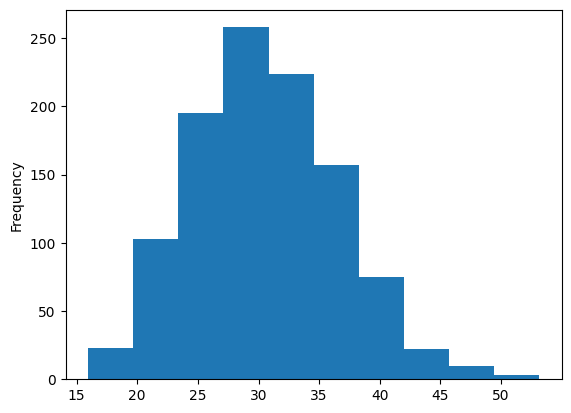

In [29]:
x_train['bmi'].plot(kind='hist')
plt.show()

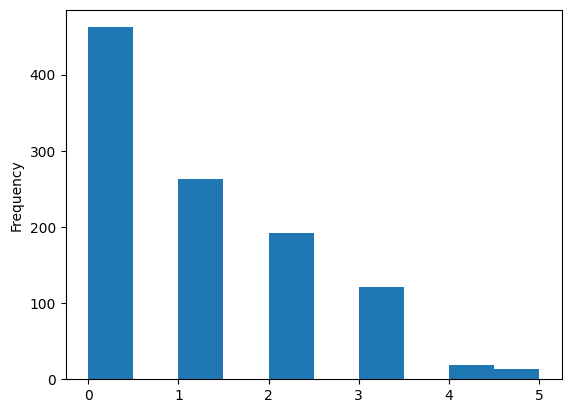

In [30]:
x_train['children'].plot(kind='hist')
plt.show()

In [31]:
x_train['children'].value_counts()

0    462
1    263
2    192
3    121
4     19
5     13
Name: children, dtype: int64

In [32]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [59]:

# In this column transform use doubles quots
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore", drop="first"), ["sex", "smoker", "region"])
)

# Create x and y
X = df.drop("charges", axis=1)
Y = df['charges']

# train test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

# fitting the trnasformation
ct.fit(x_train)

# len checking
len(x_train), len(x_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [60]:
x_train_norm = ct.transform(x_train)
x_test_norm = ct.transform(x_test)

In [108]:
x_train_norm = tf.constant(x_train_norm)
x_test_norm = tf.constant(x_test_norm)

x_train_norm, x_test_norm

(<tf.Tensor: shape=(1070, 8), dtype=float64, numpy=
 array([[0.39130435, 0.49690611, 0.4       , ..., 0.        , 1.        ,
         0.        ],
        [0.95652174, 0.43449018, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.65217391, 0.30669895, 0.2       , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.7826087 , 0.37826204, 0.        , ..., 1.        , 0.        ,
         0.        ],
        [0.        , 0.56201238, 0.        , ..., 0.        , 1.        ,
         0.        ],
        [0.63043478, 0.84907183, 0.2       , ..., 0.        , 1.        ,
         0.        ]])>,
 <tf.Tensor: shape=(268, 8), dtype=float64, numpy=
 array([[0.58695652, 0.20446597, 0.4       , ..., 0.        , 0.        ,
         0.        ],
        [0.23913043, 0.1763519 , 0.6       , ..., 0.        , 0.        ,
         0.        ],
        [0.47826087, 0.32714555, 0.2       , ..., 0.        , 0.        ,
         0.        ],
        ...,
    

In [61]:
x_train.loc[11]

age                62
sex            female
bmi             26.29
children            0
smoker            yes
region      southeast
Name: 11, dtype: object

## **Model building**

In [109]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=(8,)),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model2.compile(optimizer = tf.keras.optimizers.Adam(), loss='mae', metrics=['mae','accuracy'])

history = model2.fit(x_train_norm,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 7s 77ms/step - loss: 13124.6416 - mae: 13124.6416 - accuracy: 0.0000e+00
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13032.8037 - mae: 13032.8037 - accuracy: 0.0000e+00
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 12233.5352 - mae: 12233.5352 - accuracy: 0.0000e+00
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 9189.6729 - mae: 9189.6729 - accuracy: 0.0000e+00
Epoch 5/200
34/34 [==============================] - 2s 61ms/step - loss: 7359.3486 - mae: 7359.3486 - accuracy: 0.0000e+00
Epoch 6/200
34/34 [==============================] - 0s 9ms/step - loss: 7060.8911 - mae: 7060.8911 - accuracy: 0.0000e+00
Epoch 7/200
34/34 [==============================] - 0s 8ms/step - loss: 6779.1958 - mae: 6779.1958 - accuracy: 0.0000e+00
Epoch 8/200
34/34 [==============================] - 0s 5ms/step - loss: 6434.9736 - mae: 6434.9736 - accuracy: 0.0000e+00
Epoch 9/

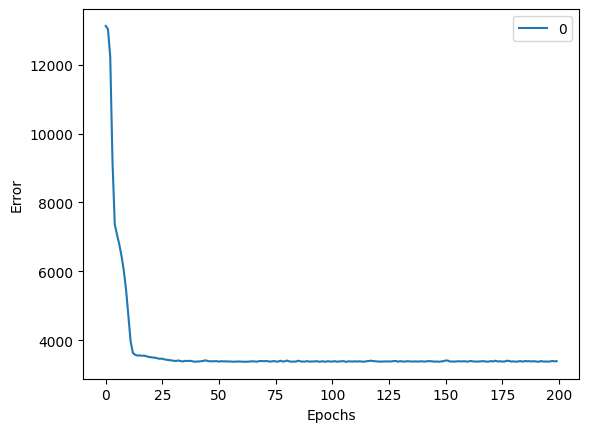

In [113]:
pd.DataFrame(history.history['mae']).plot()
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()